In [1]:
import numpy as np
import pandas as pd
import os
import re
import math
import random
import pickle


from datetime import datetime
from datetime import date
from datetime import time
import matplotlib.dates as mdates
from datetime import time
xformatter = mdates.DateFormatter('%H:%M')  # for time axis plots
import datetime
from dateutil.parser import parse
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
from matplotlib import style
style.use('seaborn-whitegrid')

from pandas.tseries.frequencies import to_offset
from pickle import load,dump
import warnings
warnings.filterwarnings('ignore')

- Plot data month 2,3 LN2 to check


In [2]:
data = pd.read_csv('./LN2_month23.csv')

In [4]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])

In [16]:
data_ln = data.loc[data['TimeStamp'].dt.date>=date(year=2023,month=2,day=9)]
data_ln = data_ln.loc[data_ln['TimeStamp'].dt.date<=date(year=2023,month=2,day=13)]

In [17]:
data_ln

,TimeStamp,LNI2_POI_MMXU1_totW,LNI2_Subs_WS_RadPOA,LNI2_Subs_WS_RadGHI,LNI2_Subs_WS_AirTemp
2304,2023-02-09 00:00:00,0.0,0.0,0.0,25.56329
2305,2023-02-09 00:05:00,0.0,0.0,0.0,25.49184
2306,2023-02-09 00:10:00,0.0,0.0,0.0,25.42039
2307,2023-02-09 00:15:00,0.0,0.0,0.0,25.34894
2308,2023-02-09 00:20:00,0.0,0.0,0.0,25.27748
...,...,...,...,...,...
3739,2023-02-13 23:35:00,0.0,0.0,0.0,25.96352
3740,2023-02-13 23:40:00,0.0,0.0,0.0,25.92802
3741,2023-02-13 23:45:00,0.0,0.0,0.0,25.89251
3742,2023-02-13 23:50:00,0.0,0.0,0.0,25.85701


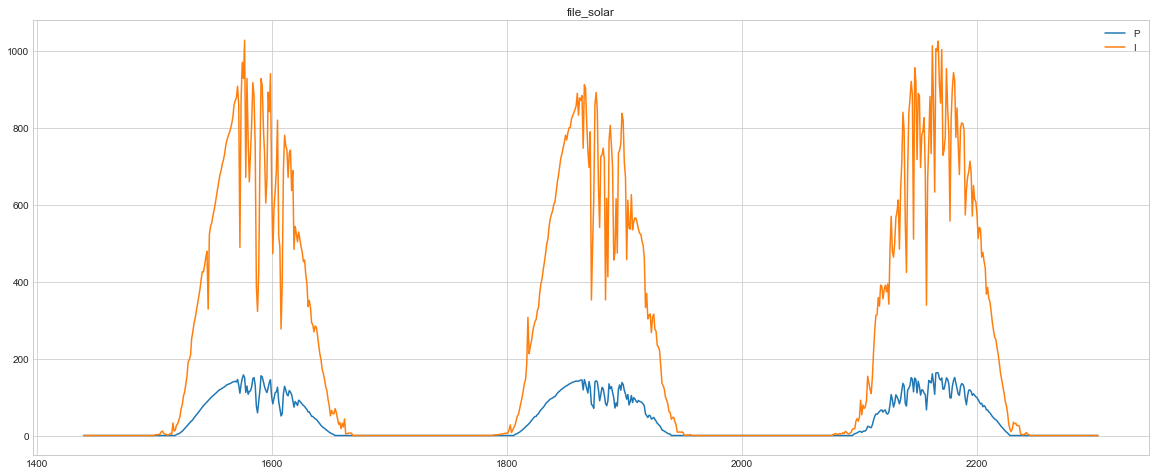

In [15]:
plt.figure(figsize=(20,8))
plt.title('file_solar')
plt.plot(data_ln['LNI2_POI_MMXU1_totW'], label='P')
plt.plot(data_ln['LNI2_Subs_WS_RadGHI'],label='I')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
path_files = './img/3/4H/'
files = os.listdir(path_files)
len(files)

In [ ]:
df = pd.DataFrame()
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(path_files, file)
        temp_df = pd.read_csv(file_path)
        df = pd.concat([df, temp_df])

In [ ]:
df = df.rename(columns={'Unnamed: 0': 'TimeStamp', 'TotW':'Power_forecast'})

In [ ]:
data_power = pd.read_csv('./LN2_month23.csv')

In [ ]:
data_power['TimeStamp'] = pd.to_datetime(data_power['TimeStamp'])

In [ ]:
data_power = data_power.rename(columns={'LNI2_POI_MMXU1_totW': 'TotW'})

In [ ]:
data_power = data_power.set_index('TimeStamp')

In [ ]:
df = data_power[['TotW']]

In [ ]:
df

In [ ]:
df_resample = resample_df(df, resample_time = 15, time_col='TimeStamp')

In [ ]:
df_resample

In [ ]:
data_weather = pd.read_csv('./LN_weather_23.csv')

In [ ]:
data_weather['TimeStamp'] = pd.to_datetime(data_weather['TimeStamp'])
data_weather = data_weather.set_index('TimeStamp')

In [ ]:
data_weather_rf = resample_df(data_weather, resample_time = 15, time_col='TimeStamp')

In [ ]:
data_weather_rf

In [ ]:
data = pd.concat([df_resample,data_weather_rf], axis = 1).dropna()

In [ ]:
data.to_csv('./test_LN2_23.csv')

In [ ]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df = df.set_index('TimeStamp')
df = df[~df.index.duplicated(keep='last')]
df = df.sort_index()


In [ ]:
df

In [ ]:
b = pd.read_csv('./LN3_month10.csv')
b['TimeStamp'] = pd.to_datetime(b['TimeStamp'])

In [ ]:
b = b.set_index('TimeStamp')

In [ ]:
def resample_df(df, resample_time, time_col='TimeStamp'):
    """
    resample_time: `minute`
    """
    resample_df = df.copy()
    if resample_time >= 30:
        resample_df = resample_df.set_index(
            resample_df[time_col] - to_offset(str(resample_time//2)+"min"))
    resample_df = resample_df.resample(str(resample_time)+'min', label='right').mean()
    return resample_df

In [ ]:
c = resample_df(b, resample_time = 15, time_col='TimeStamp')

In [ ]:
c

In [ ]:
c = c.reset_index()

In [ ]:
c= c.rename(columns={'LNI3_POI_MMXU1_totW': 'Power_reality'})

In [ ]:
d = pd.concat([c, df], axis = 1).dropna()

In [ ]:
plt.figure(figsize=(20,8))
plt.title('file_solar')
plt.plot(d['Power_reality'], label='Reality')
plt.plot(d['Power_forecast'],label='Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
data_ln = c.loc[c['TimeStamp'].dt.date>=date(year=2022,month=7,day=1)]
data_ln = data_ln.loc[data_ln['TimeStamp'].dt.date<=date(year=2022,month=9,day=30)]

In [ ]:
data_ln = data_ln.set_index('TimeStamp')